# German Residents Travel Data

## Notebook Description
This notebook is used to prepare and provide data on the travel behavior of German residents 

## Data Source
DESTATIS - Statistisches Bundesamt
Statistik über die touristische Nachfrage - Reiseverhalten 
https://www-genesis.destatis.de/genesis/online?sequenz=statistikTabellen&selectionname=45413#abreadcrumb


## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sql_functions as sf
import psycopg2

## DESTINATION BY CONTINENT

### Data Loading

In [2]:
ger_dest_cont = pd.read_csv('data/ger_dest_cont_raw.csv', delimiter=';', encoding='latin1')

In [3]:
ger_dest_cont.head(10)

,Europe,Africa,Asia,America,Australia and Oceania
2012,71664311,2648012,3966343,4244060,x
2013,75218018,3085035,4278892,4528155,x
2014,71851324,3047756,3925565,3826949,x
2015,73199426,2565442,3523335,4010395,x
2016,79015618,2169551,5146279,4243673,x
2017,77013761,3882200,5421768,5356388,x
2018,93447192,4300153,5599372,4830714,x
2019,84585790,3663327,5807010,4587480,889360
2020,33969070,788390,1044897,1030261,x
2021,45505024,1098279,1037308,1026728,-


<Axes: >

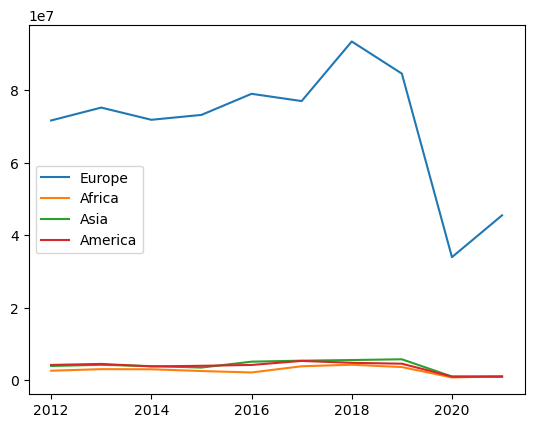

In [4]:
ger_dest_cont.plot()

In [5]:
#rename index to year and lower all column names
german_dest_continent = ger_dest_cont.reset_index()
german_dest_continent.rename(columns={'index':'year'}, inplace=True)
german_dest_continent.rename(columns=lambda x : x.lower(), inplace=True)
german_dest_continent.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)

In [6]:
#change the datatype of the 'year' column
german_dest_continent['year'] = pd.to_datetime(german_dest_continent['year'], format="%Y", errors='coerce')

In [7]:
german_dest_continent

,year,europe,africa,asia,america,australia_and_oceania
0,2012-01-01,71664311,2648012,3966343,4244060,x
1,2013-01-01,75218018,3085035,4278892,4528155,x
2,2014-01-01,71851324,3047756,3925565,3826949,x
3,2015-01-01,73199426,2565442,3523335,4010395,x
4,2016-01-01,79015618,2169551,5146279,4243673,x
5,2017-01-01,77013761,3882200,5421768,5356388,x
6,2018-01-01,93447192,4300153,5599372,4830714,x
7,2019-01-01,84585790,3663327,5807010,4587480,889360
8,2020-01-01,33969070,788390,1044897,1030261,x
9,2021-01-01,45505024,1098279,1037308,1026728,-


## DESTINATION BY COUNTRY

### Data Loading

In [8]:
ger_dest_country = pd.read_csv('data/ger_dest_country_raw.csv', delimiter=';', encoding='latin1')

In [9]:
ger_dest_country.head(10)

,Belgium,Bulgaria,Denmark,Estonia,Finland,France,Greece,Ireland,Iceland,Italy,...,Slovakia,Slovenia,Spain,Czechia,Turkey,Ukraine,Hungary,United Kingdom,Cyprus,Rest of Europe
2012,1081792,x,1990672,x,x,5525894,1371712,x,x,10734702,...,x,x,9956971,2447165,4617678,x,1157818,2188117,x,x
2013,1286893,532448,1656946,x,x,5222570,1907569,816946,x,10471824,...,x,x,9972999,1708549,4991780,x,1199237,4088788,x,710113
2014,1339362,x,2342399,x,x,5472093,2363798,608565,x,9485428,...,x,x,9143204,1632543,4893317,x,529065,2640606,x,1080462
2015,1169903,x,1881482,x,x,4837612,1563361,613248,x,10645721,...,x,x,10242453,2199242,4316205,x,1098884,3252563,x,859711
2016,1009253,1028722,1909579,x,x,5158745,2503954,684025,x,11548473,...,x,x,10392755,1854060,3344637,x,1158709,3178819,x,1034788
2017,1035849,x,1733186,x,x,6231466,2836539,823927,x,10972666,...,x,x,11092772,2477260,2613340,x,728394,3380327,x,745936
2018,1467885,718052,1938469,x,x,6143331,3297186,1119241,x,13572692,...,x,x,11671678,2630516,3815798,x,889534,4343738,x,964873
2019,1523551,623274,2713653,x,x,6467657,3210225,748310,x,11633147,...,x,x,10984639,2728299,3205210,x,1385049,2981999,x,715584
2020,500305,x,1060487,x,x,2653406,935316,x,x,4151171,...,x,x,2716432,831259,x,-,x,x,x,x
2021,644750,x,1328161,-,x,3383096,2042277,x,x,7551822,...,x,x,5414450,868133,1663875,x,x,x,x,x


<Axes: >

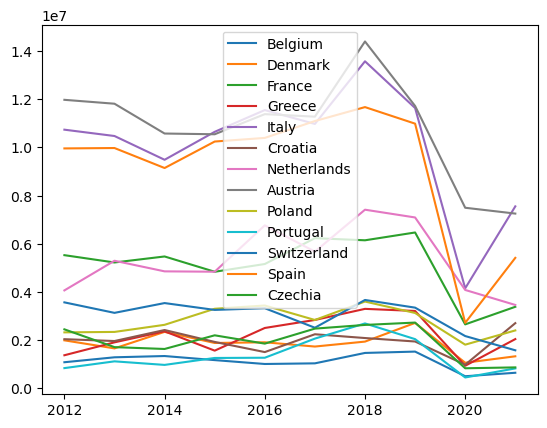

In [10]:
ger_dest_country.plot()

In [11]:
#lower all column names and replace empty space
ger_dest_country.rename(columns=lambda x : x.lower(), inplace=True)
ger_dest_country.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)

In [12]:
ger_dest_country.columns

Index(['belgium', 'bulgaria', 'denmark', 'estonia', 'finland', 'france',
       'greece', 'ireland', 'iceland', 'italy', 'croatia', 'latvia',
       'lithuania', 'luxembourg', 'malta', 'netherlands', 'norway', 'austria',
       'poland', 'portugal', 'romania', 'russian_federation', 'sweden',
       'switzerland', 'slovakia', 'slovenia', 'spain', 'czechia', 'turkey',
       'ukraine', 'hungary', 'united_kingdom', 'cyprus', 'rest_of_europe'],
      dtype='object')

In [13]:
#select the country names
country_columns = ['belgium', 
                   'bulgaria', 
                   'denmark', 
                   'estonia', 
                   'finland',
                    'france', 
                    'greece', 
                    'ireland', 
                    'iceland', 
                    'italy', 
                    'croatia', 
                    'latvia',
                    'lithuania', 
                    'luxembourg', 
                    'malta', 
                    'netherlands', 
                    'norway', 
                    'austria',
                    'poland', 
                    'portugal', 
                    'romania', 
                    'russian_federation', 
                    'sweden',
                    'switzerland', 
                    'slovakia', 
                    'slovenia', 
                    'spain', 
                    'czechia', 
                    'turkey',
                    'ukraine', 
                    'hungary', 
                    'united_kingdom', 
                    'cyprus', 
                    'rest_of_europe']

In [14]:
#import the list of iso3 codes
from country_iso_dict import country_iso_dict

In [15]:
country_iso_dict = {key.lower(): value for key, value in country_iso_dict.items()}

In [16]:
#replace the country names with the iso3 code
for i in country_columns:
    ger_dest_country.rename(columns=country_iso_dict, inplace=True)

In [17]:
ger_dest_country.columns

Index(['BEL', 'BGR', 'DNK', 'EST', 'FIN', 'FRA', 'GRC', 'IRL', 'ISL', 'ITA',
       'HRV', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'NOR', 'AUT', 'POL', 'PRT',
       'ROU', 'russian_federation', 'SWE', 'CHE', 'SVK', 'SVN', 'ESP',
       'czechia', 'TUR', 'UKR', 'HUN', 'united_kingdom', 'CYP',
       'rest_of_europe'],
      dtype='object')

In [18]:
#replace the countries not in the list with the iso3 code
ger_dest_country.rename(columns={'russian_federation':'RUS','czechia':'CZE', 'united_kingdom':'GBR'}, inplace=True)

In [19]:
ger_dest_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 2012 to 2021
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BEL             10 non-null     int64 
 1   BGR             10 non-null     object
 2   DNK             10 non-null     int64 
 3   EST             10 non-null     object
 4   FIN             10 non-null     object
 5   FRA             10 non-null     int64 
 6   GRC             10 non-null     int64 
 7   IRL             10 non-null     object
 8   ISL             10 non-null     object
 9   ITA             10 non-null     int64 
 10  HRV             10 non-null     int64 
 11  LVA             10 non-null     object
 12  LTU             10 non-null     object
 13  LUX             10 non-null     object
 14  MLT             10 non-null     object
 15  NLD             10 non-null     int64 
 16  NOR             10 non-null     object
 17  AUT             10 non-null     int64 
 18  POL    

In [20]:
#change the datatype from the country columns in float
col_num = ['BEL', 'BGR', 'DNK', 'EST', 'FIN', 'FRA', 'GRC', 'IRL',
       'ISL', 'ITA', 'HRV', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'NOR', 'AUT',
       'POL', 'PRT', 'ROU', 'RUS', 'SWE', 'CHE', 'SVK', 'SVN', 'ESP', 'CZE',
       'TUR', 'UKR', 'HUN', 'GBR', 'CYP', 'rest_of_europe']

for i in col_num:
    ger_dest_country[i] = pd.to_numeric(ger_dest_country[i], downcast='float', errors='coerce')

In [21]:
#transpose the columns to rows
german_destination = ger_dest_country.transpose().reset_index()

In [22]:
#rename the new index to iso3
german_destination.rename(columns={'index':'iso3'}, inplace=True)

In [23]:
#transform the dataset in the right shape
df_melted = german_destination.melt(id_vars='iso3', var_name='year', value_name='tourists')

In [24]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iso3      340 non-null    object 
 1   year      340 non-null    object 
 2   tourists  200 non-null    float32
dtypes: float32(1), object(2)
memory usage: 6.8+ KB


In [25]:
#change datatype from the column year to datetime
df_melted['year'] = pd.to_datetime(df_melted['year'], format="%Y", errors='coerce')

In [26]:
german_dest_country = df_melted.dropna()

In [27]:
german_dest_country

,iso3,year,tourists
0,BEL,2012-01-01,1081792.0
2,DNK,2012-01-01,1990672.0
5,FRA,2012-01-01,5525894.0
6,GRC,2012-01-01,1371712.0
9,ITA,2012-01-01,10734702.0
...,...,...,...
328,SWE,2021-01-01,520825.0
329,CHE,2021-01-01,1577465.0
332,ESP,2021-01-01,5414450.0
333,CZE,2021-01-01,868133.0


## TRANSPORT MODE

### Data Loading

In [28]:
ger_trans = pd.read_csv('data/ger_transport_raw.csv', delimiter=';', encoding='latin1')

In [29]:
ger_trans

,Airplane,Ship,Train,Bus,Motor vehicle,Other means of transport
2012,40754905,3366728,34819832,11878291,149725223,6979006
2013,41735644,3141468,34662822,14340007,149111016,5591062
2014,39370171,2947322,34110002,11952531,144536865,3993056
2015,39885520,2787698,32311342,15863473,152227500,4800413
2016,43856798,2976491,38957292,16591207,147231057,6035232
2017,45972060,3507190,35025166,14383199,139804287,4885207
2018,49138652,3987513,37168879,13239594,156575466,7769007
2019,43326257,4150904,41222411,12361317,153776487,5680510
2020,11565999,913470,21921470,2396251,106579346,2785876
2021,15356393,1472621,30627940,4675576,122135673,3890087


<Axes: >

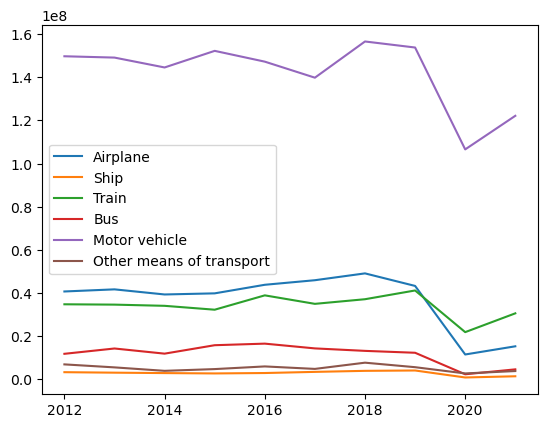

In [30]:
ger_trans.plot()

In [31]:
german_transport = ger_trans.reset_index()

In [32]:
german_transport.rename(columns={'index':'year'}, inplace=True)
german_transport.rename(columns=lambda x : x.lower(), inplace=True)
german_transport.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)

In [33]:
german_transport['year'] = pd.to_datetime(german_transport['year'], format="%Y", errors='coerce')

In [34]:
german_transport

,year,airplane,ship,train,bus,motor_vehicle,other_means_of_transport
0,2012-01-01,40754905,3366728,34819832,11878291,149725223,6979006
1,2013-01-01,41735644,3141468,34662822,14340007,149111016,5591062
2,2014-01-01,39370171,2947322,34110002,11952531,144536865,3993056
3,2015-01-01,39885520,2787698,32311342,15863473,152227500,4800413
4,2016-01-01,43856798,2976491,38957292,16591207,147231057,6035232
5,2017-01-01,45972060,3507190,35025166,14383199,139804287,4885207
6,2018-01-01,49138652,3987513,37168879,13239594,156575466,7769007
7,2019-01-01,43326257,4150904,41222411,12361317,153776487,5680510
8,2020-01-01,11565999,913470,21921470,2396251,106579346,2785876
9,2021-01-01,15356393,1472621,30627940,4675576,122135673,3890087


In [35]:
german_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   year                      10 non-null     datetime64[ns]
 1   airplane                  10 non-null     int64         
 2   ship                      10 non-null     int64         
 3   train                     10 non-null     int64         
 4   bus                       10 non-null     int64         
 5   motor_vehicle             10 non-null     int64         
 6   other_means_of_transport  10 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 688.0 bytes


## DOMESTIC AND FOREIGN TOURISM

### Data Loading

In [36]:
ger_in_out = pd.read_csv('data/ger_dest_in_out_raw.csv', delimiter=';', encoding='latin1')

In [37]:
ger_in_out

,Domestic territory,Foreign countries
2012,164795239,82728747
2013,161123466,87458553
2014,153901939,83008008
2015,164138592,83737354
2016,164682477,90965601
2017,151175053,92402056
2018,159337582,108541530
2019,160984920,99532966
2020,109295843,36866570
2021,129490949,48667340


<Axes: >

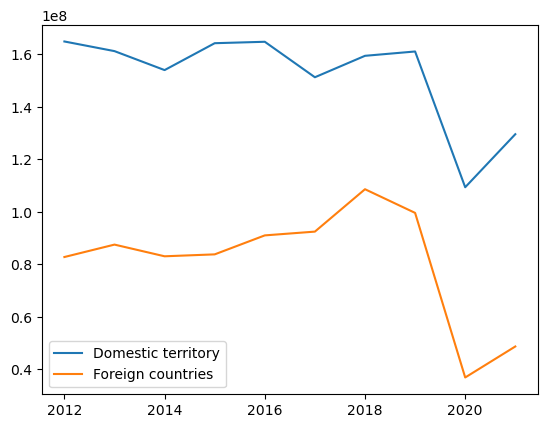

In [38]:
ger_in_out.plot()

In [39]:
ger_in_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 2012 to 2021
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Domestic territory  10 non-null     int64
 1   Foreign countries   10 non-null     int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [40]:
german_in_out = ger_in_out.reset_index()

In [41]:
german_in_out.rename(columns={'index':'year'}, inplace=True)
german_in_out.rename(columns=lambda x : x.lower(), inplace=True)
german_in_out.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)

In [42]:
german_in_out['year'] = pd.to_datetime(german_in_out['year'], format="%Y", errors='coerce')

In [43]:
german_in_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   year                10 non-null     datetime64[ns]
 1   domestic_territory  10 non-null     int64         
 2   foreign_countries   10 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 368.0 bytes


## Save Dataframes

In [44]:
german_dest_continent.to_csv('data/german_dest_continent.csv')
german_dest_country.to_csv('data/german_dest_country.csv')
german_transport.to_csv('data/german_transport.csv')
german_in_out.to_csv('data/german_in_out.csv')

## Upload to server

In [ ]:
#Check before upload
print(german_dest_continent.info())
print(german_dest_country.info())
print(german_transport.info())
print(german_in_out.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   10 non-null     datetime64[ns]
 1   europe                 10 non-null     int64         
 2   africa                 10 non-null     int64         
 3   asia                   10 non-null     int64         
 4   america                10 non-null     int64         
 5   australia_and_oceania  10 non-null     object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 608.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 334
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   iso3      200 non-null    object        
 1   year      200 non-null    datetime64[ns]
 2   tourists  200 non-null    float32       
dtypes: dateti

In [ ]:
schema = 'capstone_travel_index'
engine = sf.get_engine()

In [ ]:
# table_name = 'german_in_out'

# if engine!=None:
#     try:
#         german_in_out.to_sql(name=table_name, # Name of SQL table
#                         con=engine, # Engine or connection
#                         if_exists='replace', # Drop the table before inserting new values 
#                         schema=schema, # Use schmea that was defined earlier
#                         index=False, # Write DataFrame index as a column
#                         chunksize=5000, # Specify the number of rows in each batch to be written at a time
#                         method='multi') # Pass multiple values in a single INSERT clause
#         print(f"The {table_name} table was imported successfully.")
#     # Error handling
#     except (Exception, psycopg2.DatabaseError) as error:
#         print(error)
#         engine = None

The german_in_out table was imported successfully.
